In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader

## MNIST 실습 및 과적합 확인하기

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')
mnist_data = mnist.data

In [ ]:
mnist_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


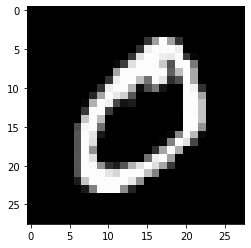

In [ ]:
mnist_ex = np.array(mnist_data.iloc[1]).reshape(28,28) ## 0번째 행만 가져옴 -> 첫번째 사진만 가져온다. (정사각형으로 만들어줌 - reshape)
plt.imshow(mnist_ex, cmap=cm.gray) ## 데이터를 흑백으로 바꿔줌

In [ ]:
# pytorch로 넘어와서 다시 다운로드

from torchvision import datasets
from torchvision import transforms

download_root = './MNIST'
train_dataset = datasets.MNIST(root = download_root,
                               train = True,
                               transform = transforms.ToTensor(),
                               download = True)

valid_dataset = datasets.MNIST(root = download_root,
                               train = False,         #train dataset을 사용하지 않기 때문에
                               transform = transforms.ToTensor(),
                               download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



In [ ]:
batch_size = 512

train_loader = DataLoader(train_dataset,
                          batch_size = batch_size)


valid_loader = DataLoader(train_dataset,
                          batch_size = batch_size)

#shuffle option이 있는데 valid의 경우는 섞으면 안된다.

In [ ]:
torch.manual_seed(1017)

class model(nn.Module):
  def __init__(self):
    super(model,self).__init__() # super안의 첫번째 인자는 class명과 동일해야한다.

    self.network = nn.Sequential(
        nn.Linear(28*28, 256), 
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,10),
        nn.Softmax() # 출력층 노드의 합을 1로 만들어줌(확률)
    )

  def forward(self,x): # 순전파가 되는 길
    pred = self.network(x)
    return pred


In [ ]:
model = model()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

In [ ]:
criterion = nn.CrossEntropyLoss()
num_epochs = 2000

In [ ]:
torch.manual_seed(1017)

best = 100

for epoch in range(num_epochs) : #epoch를 설정
  model.train() # 학습 모드
  total_train_loss = 0 # 사용할 변수를 미리 할당
  total_train_acc = 0 # 사용할 변수를 미리 할당

  for img, labels in train_loader: # 한번 돌아가면(이미지를 꺼내면) 512장씩 꺼내겟다
    img = img.reshape(-1,784) # 이미지 형태 변경 - 데이터를 (장수, 길이)의 shape로 변환 

    pred = model(img)
    loss = criterion(pred, labels)

    total_train_loss += loss.item() # epoch 하나 당 loss를 계산하기 위해서 batch 별로 loss를 누적

    optimizer.zero_grad() # 기울기가 누적이 되는걸 방지 -> 안에 있는 기울기를 전부 0으로 바꾼다.
    loss.backward() # loss값을 통해서 편미분
    optimizer.step() # 가중치를 한스텝 업데이트

    total_train_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0) # torch.argmax -> 확률 값으로 나온 것중 가장 큰 값을 가져온다.


  model.eval() # 평가 모드 -> 역전파가 이루어지지 않음
  total_valid_loss = 0
  total_valid_acc = 0

  with torch.no_grad() : # 미분을 진행하지 않겠다. -> 누적되는 기울기 자체가 없다.
    for img, labels in valid_loader :
      img = img.reshape(-1, 784)
      pred = model(img)

      loss = criterion(pred, labels)
      total_valid_loss += loss.item()
      total_train_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0)

    train_loss = total_train_loss / len(train_loader) # loader의 길이 = 전체 데이터 수 / batch_size
    valid_loss = total_valid_loss / len(valid_loader)
    train_acc = total_train_acc / len(train_loader)
    valid_acc = total_valid_acc / len(valid_loader)

  print('*** Epoch : {}/{}, Train Loss & Accuracy : ({:.3f}), Valid Loss & Accuracy : ({:.3f}, {:.3f})'.format(epoch + 1, num_epochs,
                                                                                                                train_loss, train_acc,
                                                                                                                valid_loss, valid_acc))
  

  if valid_loss < best :
    best = valid_loss
    best_epoch = epoch + 1
    print('Best Valid Loss {:.3f}'.format(best))
    converge_cnt = 0 # valid loss가 개선이 되면 0으로 초기화

  else:
    converge_cnt += 1 # valid loss가 개선되지 않으면 1씩 더해줌

  if converge_cnt > 2: # 개선이 2 epoch 이상 되지 않으면 학습을 멈추겠다.
    print('Early Stopping')
    print('Best Result : Epoch {}, Valid Loss {:.3f}'.format(best_epoch, best))
    break




KeyboardInterrupt: ignored

### 과적합 방지 : Drop-out -> epoch가 고정되었을때

In [ ]:
torch.manual_seed(1017)

class model(nn.Module):
  def __init__(self):
    super(model,self).__init__() # super안의 첫번째 인자는 class명과 동일해야한다.

    self.network = nn.Sequential(
        nn.Linear(28*28, 256), 
        ## drop out 같은 경우 활성화함수 뒤쪽에다가 넣어야한다.
        nn.ReLU(),
        nn.DropOut(0,2), # 나는 20% 만큼의 노드를 사용하지 않겟다.
        nn.Linear(256,128),
        nn.ReLU(),
        nn.DropOut(0.2), 
        nn.Linear(128,10),
        nn.Softmax() # 출력층 노드의 합을 1로 만들어줌(확률)
    )

  def forward(self,x): # 순전파가 되는 길
    pred = self.network(x)
    return pred